> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: No-show appointments Brazil medical Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In this project I will be analysing the data from 100k medical appointments in Brazil in particular we will be interested in finding trends amount the patients that not show up for their appointments.

In [624]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [625]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Column brief description:
1. **PatientId:** It is a unique identifier for each patient but would not be useful for any predictions.
2. **AppointmentId:** It’s a unique identifier for each appointment.
3. **Gender:** Whether the person is a Female (F) or Male (M).
4. **ScheduleDay:** The day on which appointment was scheduled.
5. **AppointmentDay:** The day of the appointment.
6. **Age:** Age of the person.
7. **Neighbourhood:** The neighbourhood to which the person lives.
8. **Scholarship:** Whether the person had scholarship (defined Wikipedia).
9. **Hipertension:** Whether the person has hypertension.
10. **Diabeletes:** Whether the person has diabetes.
11. **Alcoholism:** Whether the person is alcoholic.
12. **Handcap:** Whether the person is physically disabled.
13. **SMS_received:** Whether the person received a text message about the appointment.
14. **No-show:** Whether the person showed up to their appointment, it says ‘No’ if the patient showed up, and ‘Yes’ if they did not show up. 

In [626]:
# We am going to explore the data for knowing size of the dataFrame, 
# if there are any null values, general statistics, etc. 
df.shape

(110527, 14)

> There are **110527 rows** and **14 columns**.

In [627]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> Note *Age* has a negative record. Also, *Scholarship*, *Hipertension*, *Diabetes*, *Alcoholism* and *SMS_received* are assigned as 0/1, while Handcap has maximum 4 and is found to have 0/1/2/3/4 values. The *No-show* should be a boolean so we can apply some statistics to it.

In [628]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Initial finding:
> There are **no missing** or **duplicate** values. 
> The **AppointmentDay** and **ScheduledDay** values are not in datetime format.

In [629]:
# check the duplicated patients
df.duplicated().sum(), df.PatientId.duplicated().sum(), df.AppointmentID.duplicated().sum()

(0, 48228, 0)

> Note there is no duplicated rows in the data set or AppointmentID column but there are duplicated records in the PatientId column. This means there are 48228 patients who scheduled more than once appointment in the data set. 

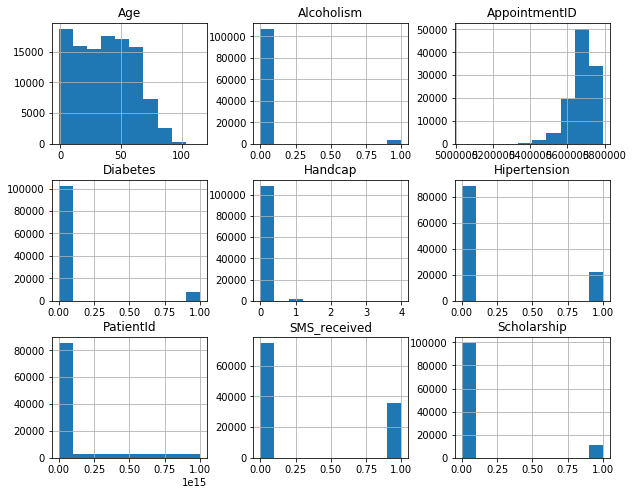

In [630]:
df.hist(figsize=(10,8));

> Note that most of the people do not have Alcoholism, Diabetes, Handcap or Hipertension. We will need to analyse if those have any impact on the showing rate. 

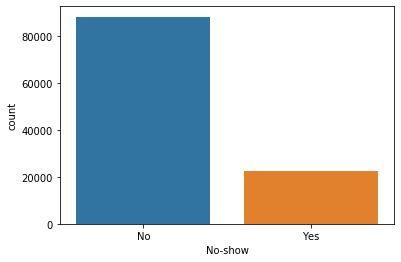

In [631]:
# Quantity of people that show up or not.
sns.countplot(df['No-show']);

> It seems that the people that show up to their appointments it is four time the people that do not. 
> (Remember that at the moment 'No' means they show up and 'Yes' that they don't)

### Data Cleaning

In [632]:
# We are going to change all column names to be smallcases and spaces be replaced by underlines for better manipulation. 
df.rename(columns = {"PatientId":"Patient_ID", "AppointmentID":"Appointment_ID", "ScheduledDay":"Scheduled_Day", "AppointmentDay":"Appointment_Day"}, inplace=True)
df.rename(columns = lambda x : x.strip().lower().replace('-','_'), inplace=True)
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [633]:
# In the previous section we saw the appointment_id is a unique value, so we can set it as the index of the DataFrame.
df.set_index('appointment_id', inplace = True)
df.head()

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
appointment_id,,,,,,,,,,,,,
5642903,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
5642503,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
5642549,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
5642828,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
5642494,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [634]:
# Converting day columns to Datatime format.
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])
df.head(1)

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
appointment_id,,,,,,,,,,,,,
5642903,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [635]:
# We need to check if there is any record with appointment_day ahead of scheduled_day and drop them.
df.drop(index = df.query('scheduled_day.dt.date > appointment_day.dt.date').index, axis=0, inplace=True)

# Check if we deleted all of them.
df.query('scheduled_day.dt.date > appointment_day.dt.date')

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
appointment_id,,,,,,,,,,,,,


In [636]:
# We can create a new column for knowing how many days in advance the appointments are programmed.
# To see if this affect the attendance. 
df.insert(df.columns.get_loc("appointment_day")+1, 'advance_days', df.appointment_day.dt.date-df.scheduled_day.dt.date)

# Change advance_days format from datetime to numeric for modeling later.
df['advance_days'] = df.advance_days.dt.days

df.advance_days.value_counts().head(10)

0     38563
2      6725
4      5290
1      5213
7      4906
6      4037
5      3277
14     2913
3      2737
8      2332
Name: advance_days, dtype: int64

> It seems most of the appointments are set on the same day or within the same week. We will analysis this in the next section.

In [637]:
# We can now drop the appointment_day and scheduled_day columns 
#    because we are not going to use them for further analysis
df.drop(['scheduled_day', 'appointment_day'], axis=1, inplace=True)

In [638]:
# We are going to make more useful the no_show column for further analysis.
# Remember 'No' means they attend and 'Yes' they did not attend an appointment.

# We are going to add a new column attendance that is going to be a copy of no_show.
df.insert(df.columns.get_loc("no_show")+1, 'attendance', df["no_show"])

# We are going to replace the values in no_show for booleans and rename it to no_attendance.
df['no_show'].replace({"Yes": True, "No": False}, inplace=True)
df.rename(index=str, columns={'no_show': 'no_attendance'}, inplace=True)

# We are going to change the values of the new column attendance to be 0, 1 for further analysis. 
# Remember this column is the inverse of no_attendance. 
df['attendance'].replace({"Yes": 0, "No": 1}, inplace=True)

df.head(2)

,patient_id,gender,advance_days,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_attendance,attendance
appointment_id,,,,,,,,,,,,,
5642903,2.987250e+13,F,0,62,JARDIM DA PENHA,0,1,0,0,0,0,False,1
5642503,5.589978e+14,M,0,56,JARDIM DA PENHA,0,0,0,0,0,0,False,1


In [639]:
# We are going to drop the records with a negative age (less than 0).
df.drop(df.query('age < 0').index, inplace=True)

In [640]:
# As we saw in the previous section there are different levels of handcap. However, it does not specify what they mean.
# We are going to transform the handcap values to booleans (0: False, 1: True).
df['handcap'].replace({1: 1, 2: 1, 3: 1, 4: 1}, inplace=True)

In [641]:
# Before finishing cleaning the data we are going to drop columns neighbourhood and scholarship 
# because they don't seem relevant for this study.
df.drop(['neighbourhood', 'scholarship'], axis=1, inplace=True)

In [642]:
# List of final columns.
list(df.columns.values)

['patient_id',
 'gender',
 'advance_days',
 'age',
 'hipertension',
 'diabetes',
 'alcoholism',
 'handcap',
 'sms_received',
 'no_attendance',
 'attendance']

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 
#### Does the gap between the scheduled day and the appointment day an affect in the show rate? 

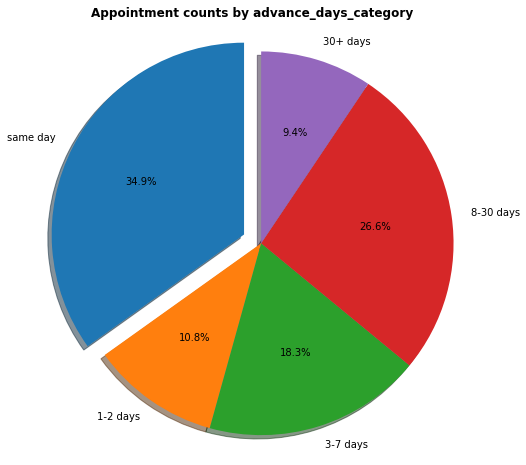

In [643]:
# As we saw in the previous section the majority of the appointments are scheduled for the same day 
# or within the same week. 

# We are going to groups the days in advances in 5 categories: same day, 1-2 days, 3-7 days, 8-30 days and 30+ days.

# First we are going to check the maximum number of waiting days.
df['advance_days'].max() # 179

# We are going to create the new column with this categories and then visualize the data with a pie chart.
df['advance_days_category'] = pd.cut(df['advance_days'], bins=[-1,0,2,7,30,180], 
                                     labels=['same day', '1-2 days', '3-7 days', '8-30 days', '30+ days'])
df_advance_days = df.groupby('advance_days_category').size()
       
labels = list(df.groupby('advance_days_category').groups.keys())
explode = (0.1, 0, 0, 0, 0) 

fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(df_advance_days, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  
ax1.set_title('Appointment counts by advance_days_category', loc='center', fontdict={'fontweight': 'bold', 'fontsize': 'large'})

plt.show();


> As we could see 34.9% of the patient's appointments are scheduled at the same day. Let's look if this have an affect on attendance. 

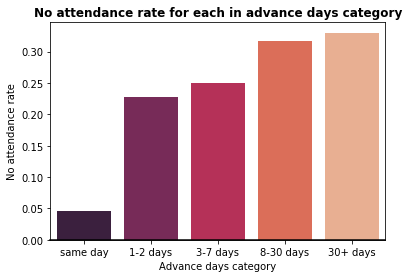

In [644]:
# We are going to count the no attendance by days in advance categories.
no_attendance_count = df[df.no_attendance].groupby('advance_days_category')['no_attendance'].count(); 

# Total number of patients per days in advance categories.
total_count = df.advance_days_category.value_counts() 

# Set up the matplotlib figure for repesentation of the data found.
f, ax1 = plt.subplots()
sns.barplot(x=no_attendance_count.keys(), y=(no_attendance_count / total_count), palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_xlabel("Advance days category")
ax1.set_ylabel("No attendance rate")
ax1.set_title("No attendance rate for each in advance days category", loc='center', fontdict={'fontweight': 'bold', 'fontsize': 'large'});

> We can see patients rarely miss appointments if they are scheduled for the same day appointments, the attendance is almost 100%. As the gap between scheduled and appointment days increases more likely is that a person misses it.

### Research Question 2  
#### Does the gap age of the patient an affect in the show rate? 

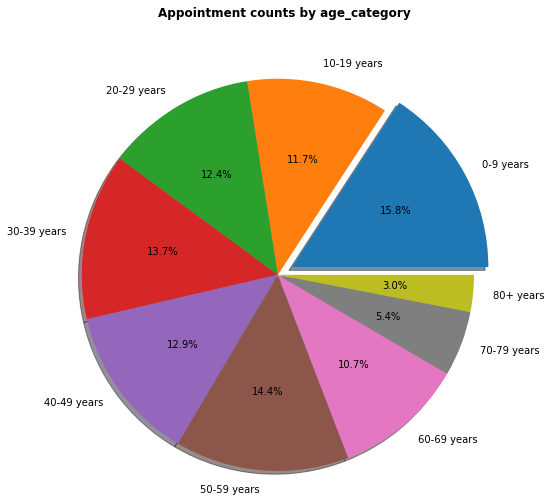

In [645]:
# For answering this question we are going to do something similar, we are going to add a new column 
# for grouping ages in categories.
df['age'].max() # 115

df['age_category'] = pd.cut(df['age'], bins=[-1,9,19,29,39,49,59,69,79,120], 
                                     labels=['0-9 years', 
                                             '10-19 years', 
                                             '20-29 years', 
                                             '30-39 years', 
                                             '40-49 years', 
                                             '50-59 years', 
                                             '60-69 years', 
                                             '70-79 years', 
                                             '80+ years'])

# Representation of the data.
sizes = df.groupby('age_category').size()       
labels = list(df.groupby('age_category').groups.keys())
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0) 

fig1, ax1 = plt.subplots(figsize=(8, 8))
ax1.pie(sizes, explode=explode, autopct='%1.1f%%', labels=labels, radius=1.2, shadow=True, startangle=0)
ax1.axis('equal') 
ax1.set_title('Appointment counts by age_category', y=1.08, loc='center', fontdict={'fontweight': 'bold', 'fontsize': 'large'})
plt.show();


> As we can see in the piechart the biggest portions of patients are between 0 and 9 years old. Which make sense because children are more likely to get ill. 
> Also we can see that the percentatge of patients decreased as they get older. Which make sense by obvious reasons. 

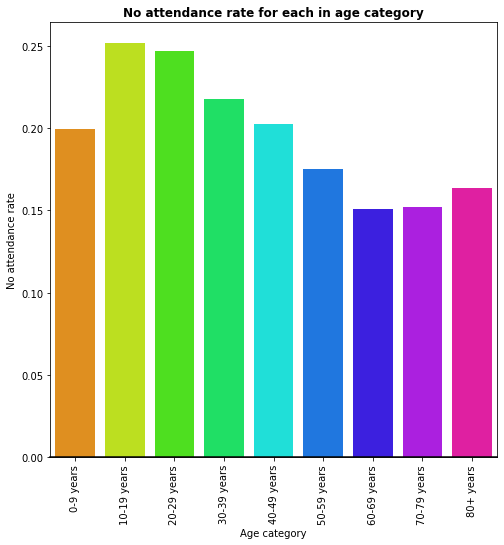

In [646]:
# Let see how the range of age affects the no attendance.
no_attendance_count = df[df.no_attendance].groupby('age_category')['no_attendance'].count(); 

# Total number of patients per age category
total_count = df.age_category.value_counts() 

# Set up the matplotlib figure
f, ax1 = plt.subplots(figsize=(8, 8))
sns.barplot(x=no_attendance_count.keys(), y=(no_attendance_count / total_count), palette="hsv", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
plt.xticks(rotation=90)
ax1.set_xlabel("Age category")
ax1.set_ylabel("No attendance rate")
ax1.set_title("No attendance rate for each in age category", loc='center', fontdict={'fontweight': 'bold', 'fontsize': 'large'});

> It seems that people between 20 and 50 years old are more likely to miss their appointment. Older people tend to miss less appointments as well as the children under 10 years old. Which could be because old people tend to be look after by family or professionals and young children have their parent scheduling their appointments.

### Research Question 3 
#### Has the gender any affect in missing an appointment? 

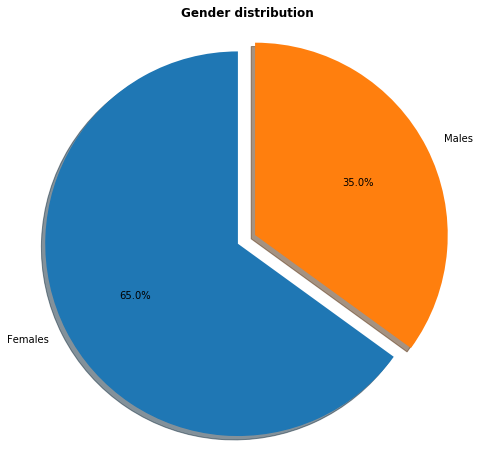

In [647]:
# First we are going to calculate the percentatge of females and males. 
sizes = df.groupby('gender').size()
labels = ['Females', 'Males']
explode = (0.1, 0) 

fig1, ax1 = plt.subplots(figsize=(8, 8))
ax1.pie(sizes, explode=explode, autopct='%1.1f%%', labels=labels,
        shadow=True, startangle=90)
ax1.axis('equal') 
ax1.set_title('Gender distribution', loc='center', fontdict={'fontweight': 'bold', 'fontsize': 'large'})
plt.show();

> Out of all the patients there are 65% of females.

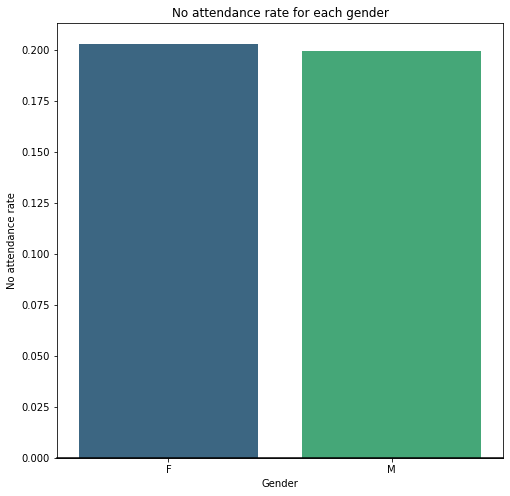

In [648]:
# Now we can have a look if the gender of the patients has an affect in the no attendance to an appointment.
no_attendance_count = df[df.no_attendance].groupby('gender')['no_attendance'].count(); 

# Total number patients per gender.
total_count = df.gender.value_counts() 

# Set up the matplotlib figure
f, ax1 = plt.subplots(figsize=(8, 8))
sns.barplot(x=no_attendance_count.keys(), y=(no_attendance_count / total_count), palette="viridis", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_xlabel("Gender")
ax1.set_ylabel("No attendance rate")
ax1.set_title("No attendance rate for each gender");

> It does not seems there is any different in attendance by gender. Both females and males have almost the same probability to show up in an appointment.

### Research Question 4  
#### If a pacient has missed an appointment is it more likely to miss more? 

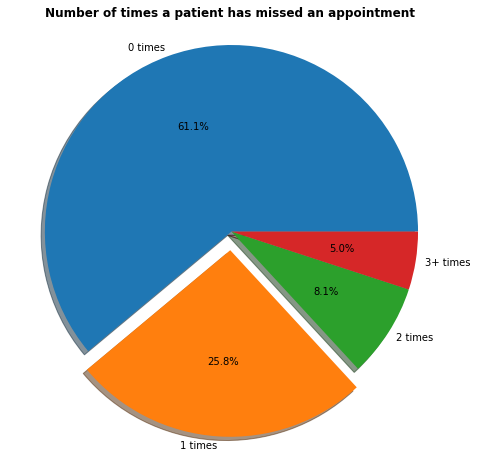

In [649]:
# We are going to group the number of times a patient has missed an appointment. 
df['num_no_attendance'] = df['no_attendance'].groupby(df['patient_id']).transform('sum')

df['num_no_attendance'] = pd.cut(df['num_no_attendance'], bins=[-1, 0,1,2,19], 
                                     labels=['0 times', 
                                             '1 times', 
                                             '2 times',  
                                             '3+ times'])

sizes = df.groupby('num_no_attendance').size()       
labels = list(df.groupby('num_no_attendance').groups.keys())
explode = (0, 0.1, 0, 0) 

fig1, ax1 = plt.subplots(figsize=(8, 8))
ax1.pie(sizes, explode=explode, autopct='%1.1f%%', labels=labels, pctdistance = 0.6, labeldistance = 1.05, 
        shadow=True, startangle=0)
ax1.axis('equal')
ax1.set_title('Number of times a patient has missed an appointment', loc='center', fontdict={'fontweight': 'bold', 'fontsize': 'large'})
plt.show();

> 61.5% of the patients never missed and appointment and a quarter of the patients have missed only one appointment. We can see that the percentatge of people missing more than one appointment is less than 15%.

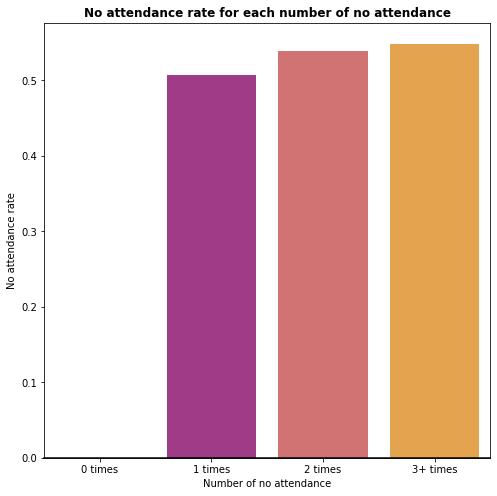

In [650]:
# Now we are going to see if we can see a trend between the number of appointments missed and the no attendance. 
no_attendance_count = df[df.no_attendance].groupby('num_no_attendance')['no_attendance'].count(); 

# Total number of patients count per number of times not attending an appointment. 
total_count = df.num_no_attendance.value_counts() 

# Set up the matplotlib figure
f, ax1 = plt.subplots(figsize=(8, 8))
sns.barplot(x=no_attendance_count.keys(), y=(no_attendance_count / total_count), palette="plasma", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_xlabel("Number of no attendance")
ax1.set_ylabel("No attendance rate")
ax1.set_title("No attendance rate for each number of no attendance", loc='center', fontdict={'fontweight': 'bold', 'fontsize': 'large'});

> We can see that the more times a patient misses an appointment the more likely they are going to miss more appointments.

### Research Question 5 
#### Percentage of SMS sent to people who showed up for their appointment, does it make sense to keep the service? 

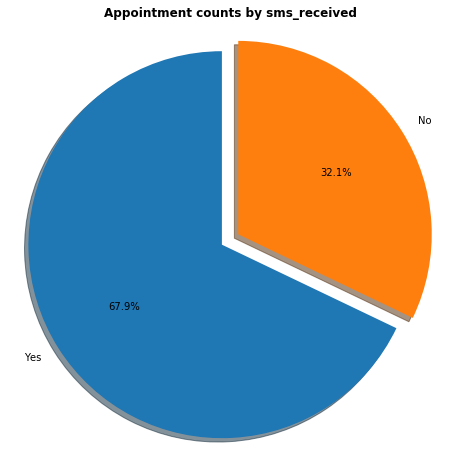

In [651]:
# We are going to calculate how efficient is the reminder SMS system.
sizes = df.groupby('sms_received').size()
labels = ['Yes', 'No']
explode = (0.1, 0) 

fig1, ax1 = plt.subplots(figsize=(8, 8))
ax1.pie(sizes, explode=explode, autopct='%1.1f%%', labels=labels,
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Appointment counts by sms_received', loc='center', fontdict={'fontweight': 'bold', 'fontsize': 'large'})
plt.show();

> A bit less than the 70% of the patients have received and sms. We could says that is a system quite efficient. Taking in account that may older people and children maybe don't have a phone and that a lot of people have their appointment for the same day. 

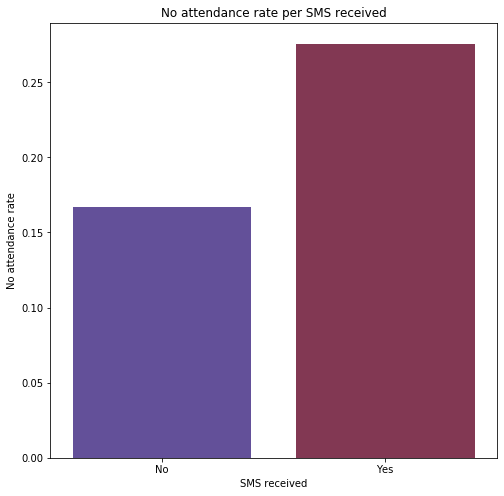

In [652]:
# Let see if that make a difference in attendance.
no_attendance_count = df[df.no_attendance].groupby('sms_received')['no_attendance'].count(); 

# Total number of patients per sms.
total_count = df.sms_received.value_counts() 

# Set up the matplotlib figure
f, ax1 = plt.subplots(figsize=(8, 8))
sns.barplot(x=['No', 'Yes'], y=(no_attendance_count / total_count), palette="twilight", ax=ax1)
ax1.set_xlabel("SMS received")
ax1.set_ylabel("No attendance rate")
ax1.set_title("No attendance rate per SMS received");

> The bar charts confirms that the SMS system prevents patients from not showing up to their appointments. 

### Research Question 6 
#### Do any of the health conditions in the data affect the attendance? 

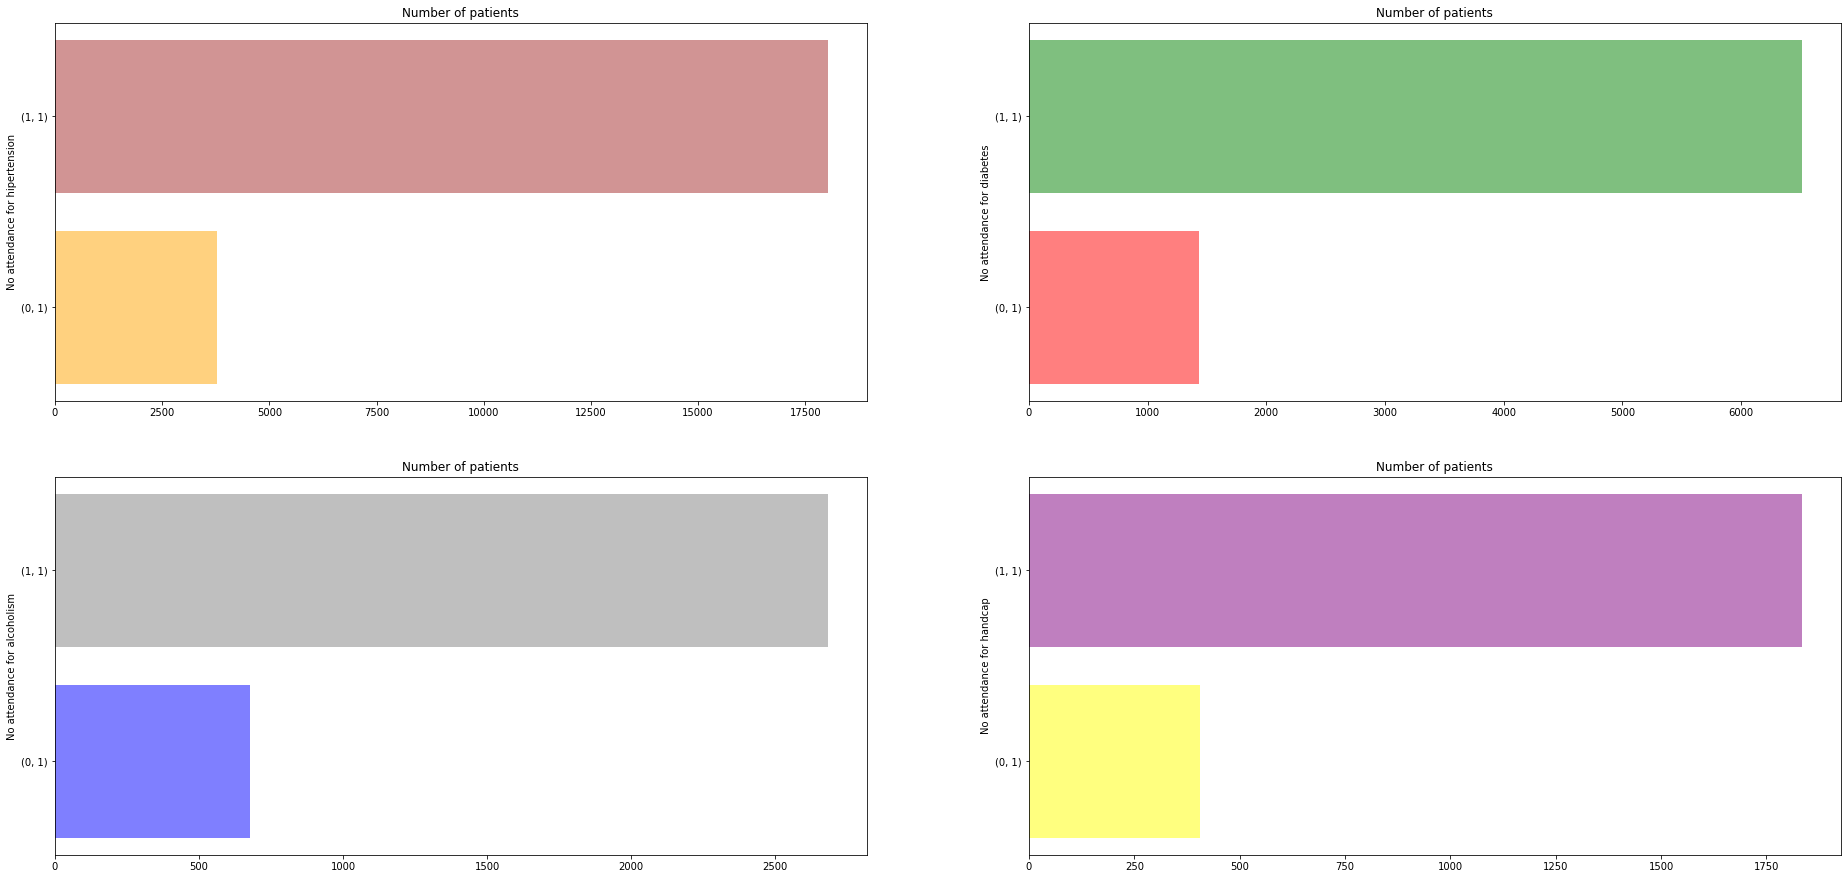

In [653]:
# In this question we are going to see if hipertension, diabetes, alcoholism or handcap affect the 
# probability of attendance. 

# We are going to use the column 'attendance' that we create at the cleaning section, 
# which is the inverse of 'no_attendance' and the values are (1: patient attend, 0: patient didn't attend)

fig = plt.figure(figsize=(32,32))

# Plot for hipertension
plt.subplot(4, 2, 1)
df_hipertension = df.query("hipertension == '1'")
df_hipertension_count = df_hipertension.groupby(['attendance','hipertension'])['patient_id'].count() 

objects = list(df_hipertension_count.keys())
y_pos = np.arange(len(objects))
performance = df_hipertension_count

plt.barh(y_pos, performance, align='center', alpha=0.5, color=['orange', 'brown'])
plt.yticks(y_pos, objects)
plt.ylabel('No attendance for hipertension')
plt.title('Number of patients')

# Plot for diabetes
plt.subplot(4, 2, 2)
df_diabetes = df.query("diabetes == '1'")
df_diabetes_count = df_diabetes.groupby(['attendance','diabetes'])['patient_id'].count() 

objects = list(df_diabetes_count.keys())
y_pos = np.arange(len(objects))
performance = df_diabetes_count

plt.barh(y_pos, performance, align='center', alpha=0.5, color=['red', 'green'])
plt.yticks(y_pos, objects)
plt.ylabel('No attendance for diabetes')
plt.title('Number of patients')

# Plot for alcoholism
plt.subplot(4, 2, 3)
df_alcoholism = df.query("alcoholism == '1'")
df_alcoholism_count = df_alcoholism.groupby(['attendance','alcoholism'])['patient_id'].count() 

objects = list(df_alcoholism_count.keys())
y_pos = np.arange(len(objects))
performance = df_alcoholism_count

plt.barh(y_pos, performance, align='center', alpha=0.5, color=['blue', 'grey'])
plt.yticks(y_pos, objects)
plt.ylabel('No attendance for alcoholism')
plt.title('Number of patients')

# Plot for handcap 
plt.subplot(4, 2, 4)
df_handcap = df.query("handcap == '1'")
df_handcap_count = df_handcap.groupby(['attendance','handcap'])['patient_id'].count() 

objects = list(df_handcap_count.keys())
y_pos = np.arange(len(objects))
performance = df_handcap_count

plt.barh(y_pos, performance, align='center', alpha=0.5, color=['yellow', 'purple'])
plt.yticks(y_pos, objects)
plt.ylabel('No attendance for handcap')
plt.title('Number of patients')

plt.show();

> Overall we can see that patients suffering from hypertension, diabetes, alcoholism or any handcap are more likely to show up for their appointments.

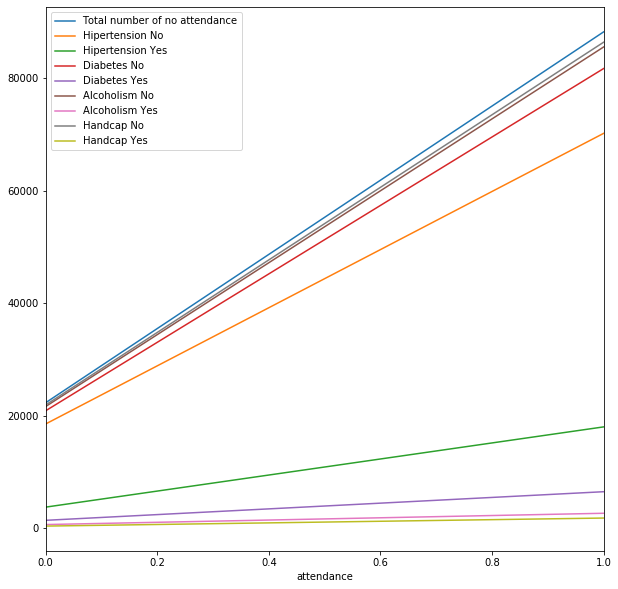

In [654]:
# Let's see know the differences between having a health condition or not in terms of probability of attendance.

df['attendance'].value_counts().plot(legend=True, label = "Total number of no attendance")
                                                               
df_hiper_no = df.query("hipertension == '0'")
df_hiper_no.groupby(['attendance'])['hipertension'].count().plot(legend=True, label = "Hipertension No");                                                               
df_hiper = df.query("hipertension == '1'")
df_hiper.groupby(['attendance'])['hipertension'].count().plot(legend=True, label = "Hipertension Yes");
                                                               
df_dia_no = df.query("diabetes == '0'")
df_dia_no.groupby(['attendance'])['diabetes'].count().plot(legend=True, label = "Diabetes No");
df_dia = df.query("diabetes == '1'")
df_dia.groupby(['attendance'])['diabetes'].count().plot(legend=True, label = "Diabetes Yes");

df_acl_no = df.query("alcoholism == '0'")
df_acl_no.groupby(['attendance'])['alcoholism'].count().plot(legend=True, label = "Alcoholism No");
df_acl = df.query("alcoholism == '1'")
df_acl.groupby(['attendance'])['alcoholism'].count().plot(legend=True, label = "Alcoholism Yes");
                                                               
                                                               
df_hnd_no = df.query("handcap == '0'")
df_hnd_no.groupby(['attendance'])['handcap'].count().plot(legend=True, label = "Handcap No");
df_hnd = df.query("handcap == '1'")
df_hnd.groupby(['attendance'])['handcap'].count().plot(legend=True, label = "Handcap Yes", figsize=(10,10));


> In this plot we can see clearly that the majority of patients with a health condition tend to show up to their appointments.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

We have looked at some columns in the data set and some of them show relationships with whether the patient showed up to the appointment. Summary:

* The days in advance an appointment is scheduled seems to be related to no_show. 

* The age of the patients also seems to be related to no_show.

* The sms reminder system seems to have a positive impact on the no show rate.

* The gender of the patient doesn't seem to be related to no_show.

* The health conditions seem to have a strong relation to attendance. 

* Patients seem to be more likely to miss their appointments if they are scheduled in more than a week.

* Patients seem to be more likely to miss an appointment if they already miss one or more.

<a id='limitations'></a>
## Limitations
* The data set contains a lot more information that haven't been used such as neighbourhood or scholarship. 

* Also there are 0, 1, 2, 3, 4, types handicap but we do not know what each level means so in our project we just treat them as whether patients are handcapped or not, ignoring the handicap levels.